# STOR 566, Homework 1
### Instructor: Yao Li
### Keywords: optimization
### Due date: Sep 07, 11:55pm
### **Submission Instruction**

- Please download this script and use it to answer the questions in the homework. 
- For submission, please include your code, code output and answers in the script and submit the ipynb file on sakai.
- Please don't modify existing cells. But you can add cells between the exercise statements.
- To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language. For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Problem 1 (10 points)

Prove whether the following functions are convex or not.
- (a) (5 points) $f(x_1,x_2)=(x_1x_2-1)^2$, where $x_1, x_2\in \mathbb{R}$.
- (b) (5 points) $f(\mathbf{w}_1, \mathbf{w}_2)=\|\mathbf{w}_1-\mathbf{w}_2\|^2_2$,  where $\mathbf{w}_1, \mathbf{w}_2\in \mathbb{R}^2$.


Solution of Problem 1 (a): By calculating the hessian we get 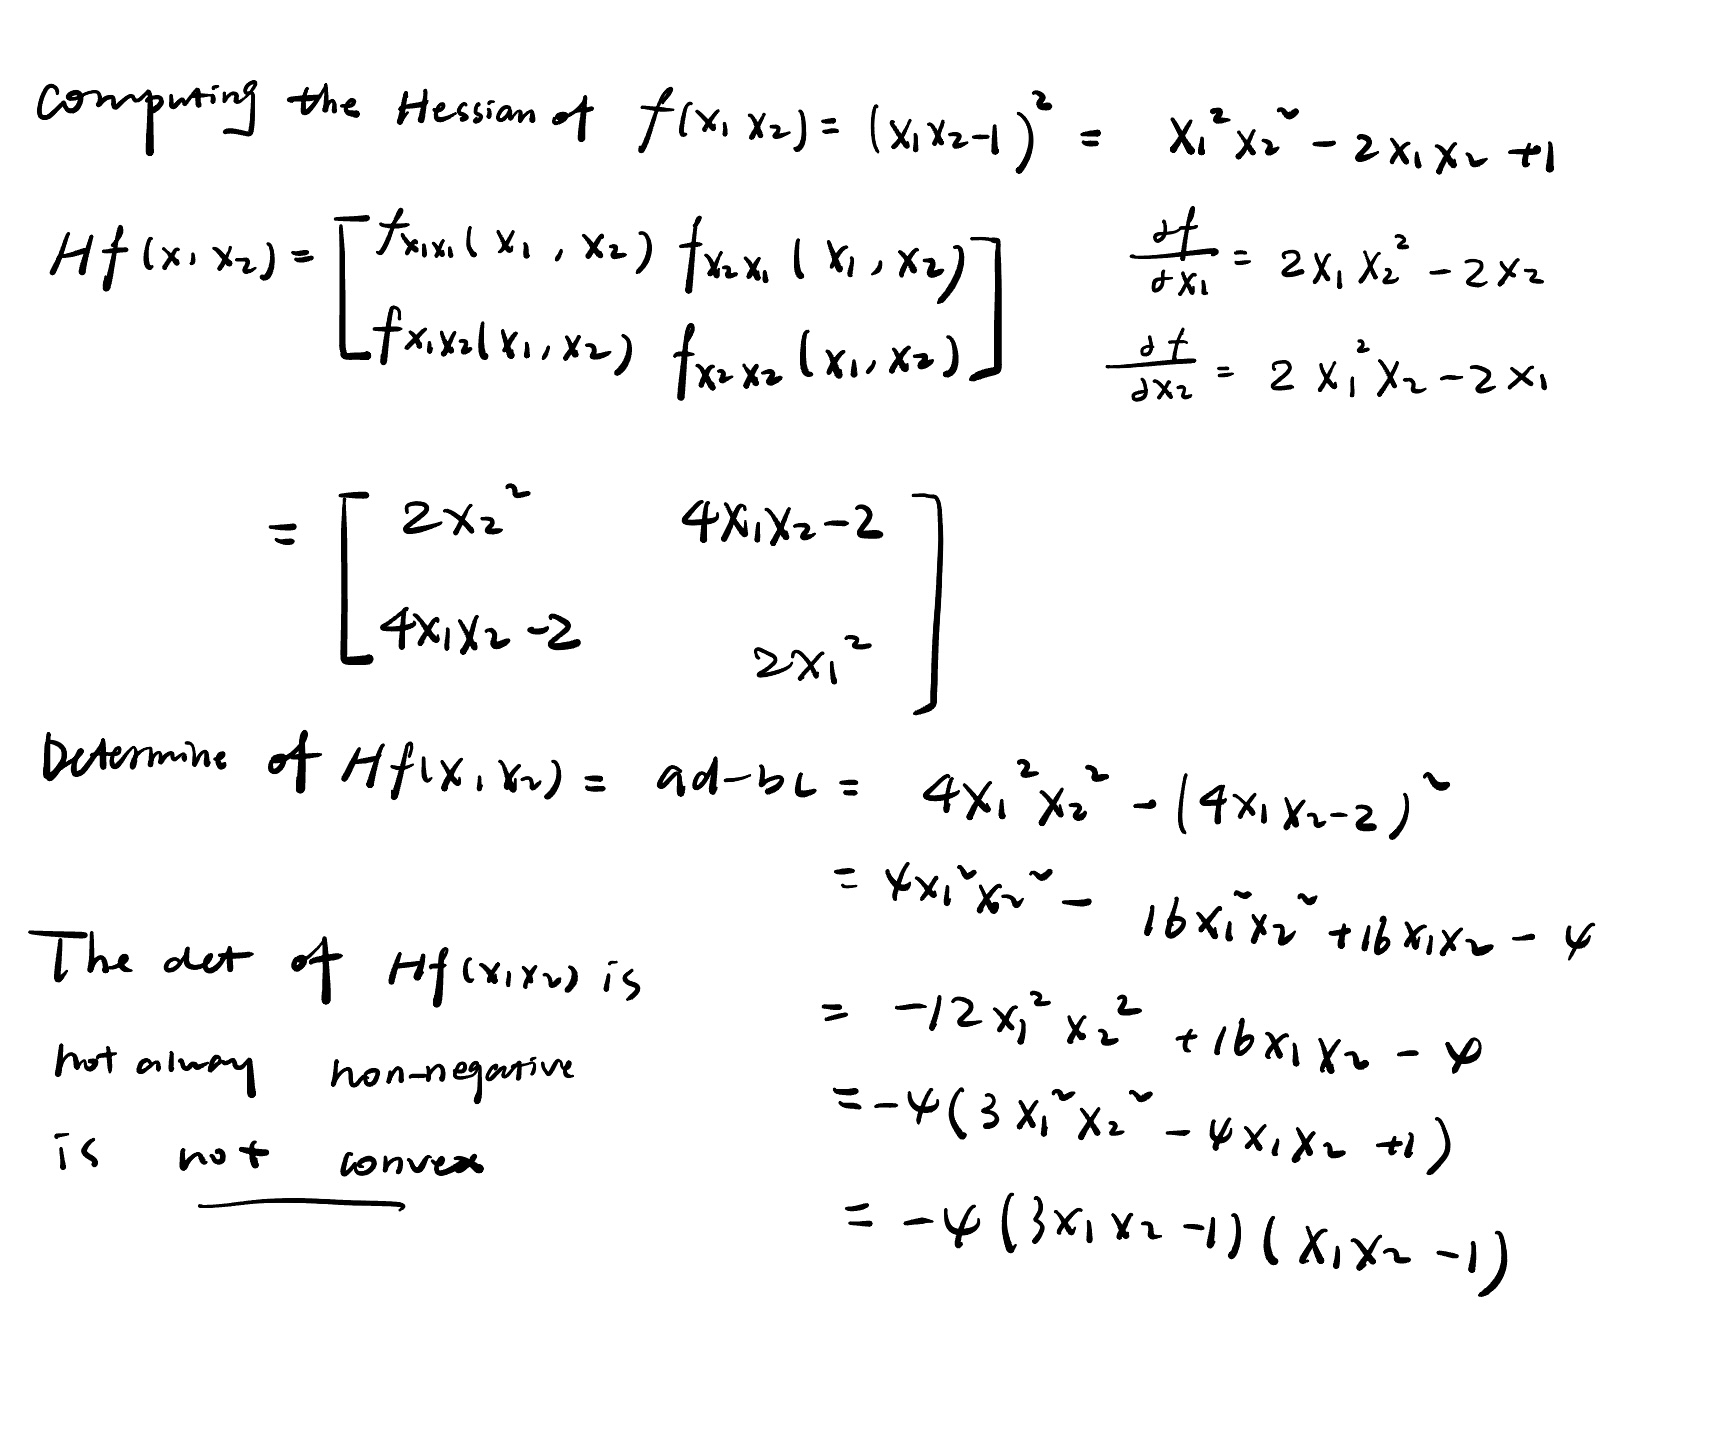


Answer:It is not convex

---



Solution of Problem 1 (b):
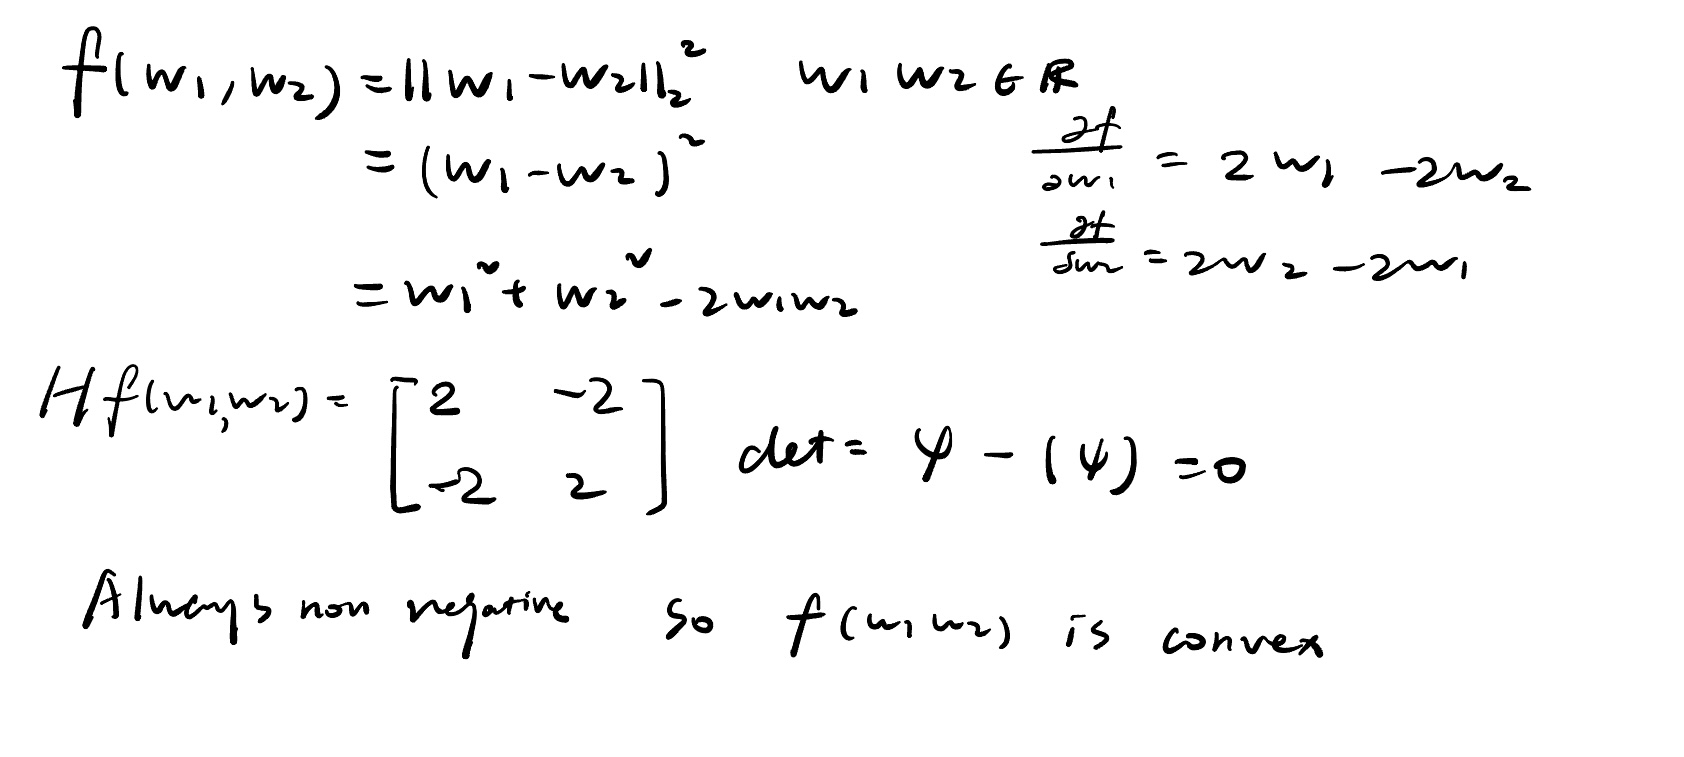

Answer: It is convex




## Problem 2 (10 points)

Identify stationary points for $f(x) = 2x_1 +12x_2 +x^2_1 -3x^2_2$? Are they local minimum/maximum; global minimum/maximum or saddle points? Why?

Answer:
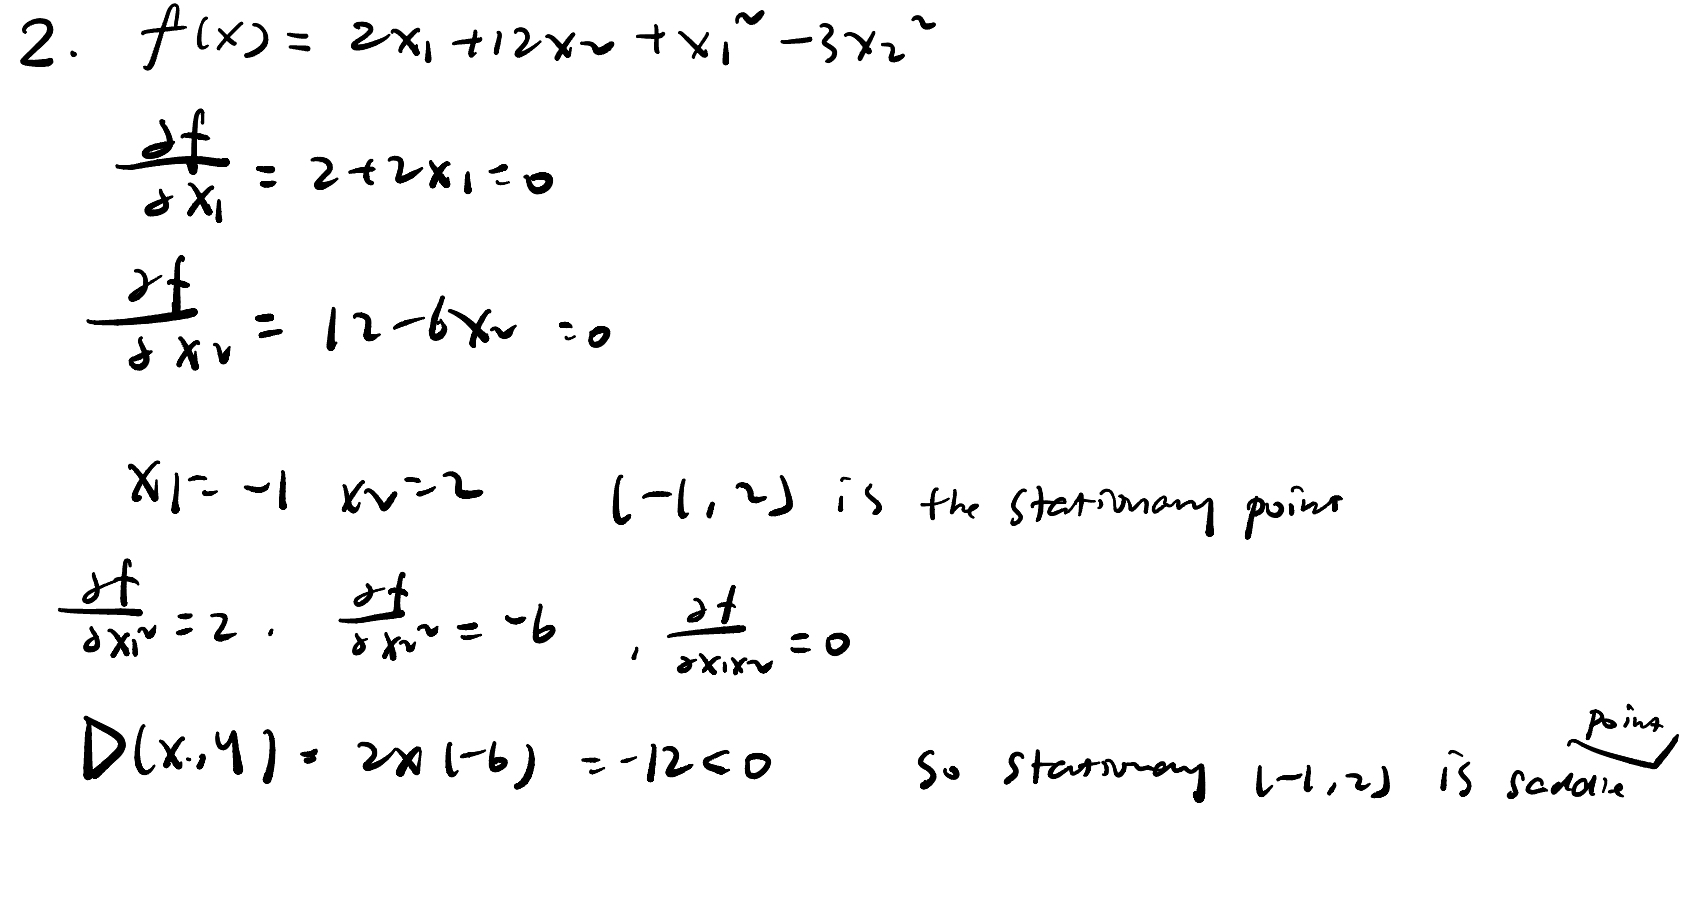

## Problem 3 (80 points)

Given training data $\{\mathbf{x}_i, y_i\}^n_{i=1}$, each $x_i\in \mathbb{R}^d$ and $y_i \in \{+1, -1\}$, we try to solve the following logistic regression problem by gradient descent:
\begin{align}
\min_{\mathbf{w}\in R^d}\left\{\frac{1}{n}\sum_{i=1}^n\log(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i})+\frac{1}{2}\|\mathbf{w}\|^2_2  \right\} := f(\mathbf{w}).
\end{align}
Test the algorithm using the 'heart scale' dataset with $n = 270$ and $d = 13$: the matrix $\mathbf{X}$ is stored in the file 'X$\_$heart', and the vector $\mathbf{y}$ is stored in the file 'y$\_$heart'. ('X$\_$heart' contains $n$ lines, each line stores a vector $\mathbf{x}_i$ with $d$ real numbers. 'y$\_$heart' contains the $\mathbf{y}$ vector.)

In [11]:
## Please implement data loading yourself
import matplotlib.pyplot as plt


In [28]:
## Load data:
import numpy as np 
X = np.loadtxt('X_heart', unpack = True)
print(X.shape)
y = np.loadtxt('y_heart',unpack = True)
print(y.shape)


(13, 270)
(270,)


In [41]:
import pandas as pd
y = pd.read_csv('y_heart')
X = pd.read_csv('X_heart')
print(X.shape)

(269, 1)


In [35]:
X.columns = ['col']
X = X.col.str.extract('([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+ )([^a-zA-Z]+)', expand=True)
X = X.apply(pd.to_numeric)
X = X.to_numpy()
y = y.to_numpy()

### (a) (5 points) Compute the gradient of $f(\mathbf{w})$ w.r.t. $\mathbf{w}$.

Answer: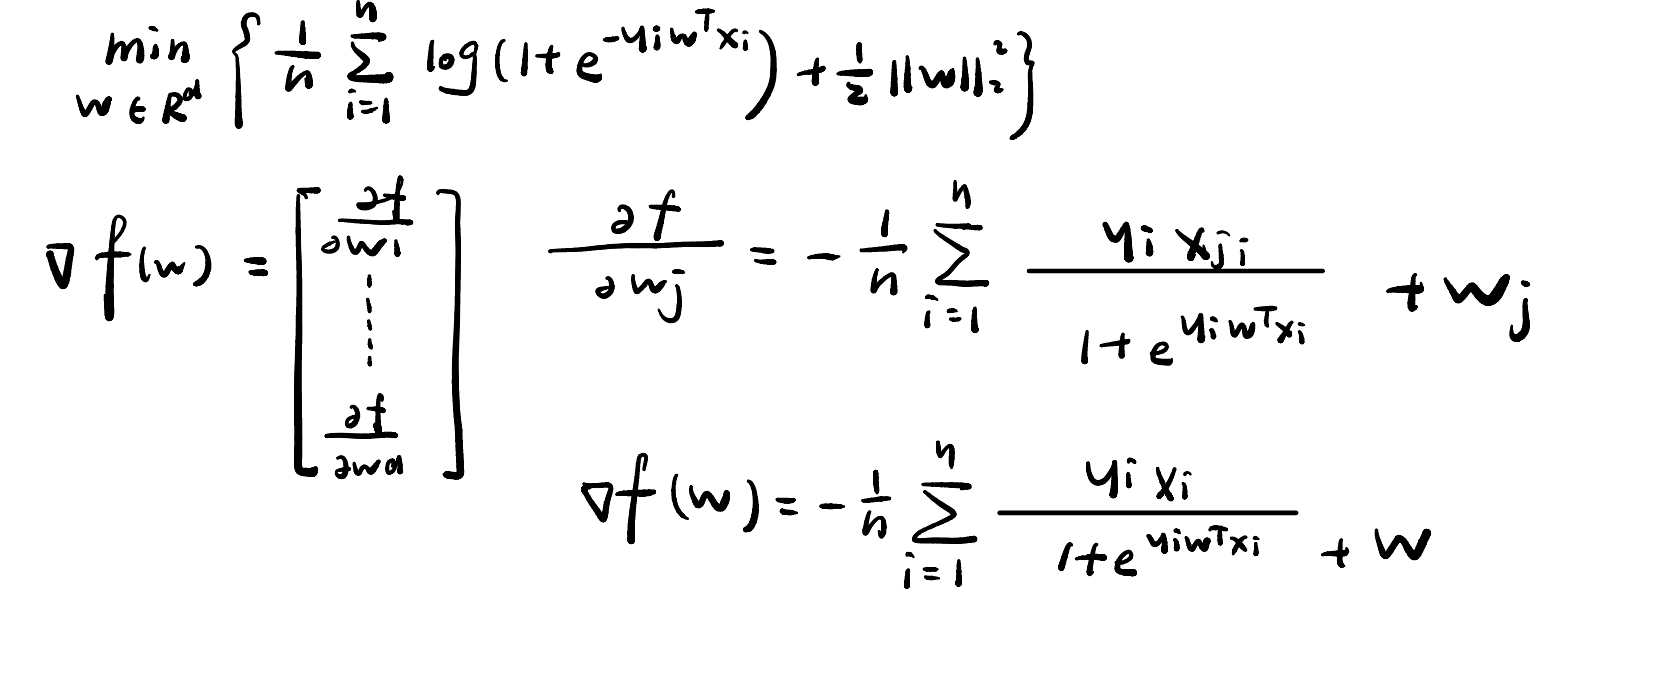

### (b) (30 points) Implement the gradient descent algorithm with a fixed step size $\eta$. Find a small $\eta_1$ such that the algorithm converges. Increase the step size to $\eta_2$ so the algorithm cannot converge. Run 50 iterations and plot the iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot for $\eta_1$ and $\eta_2$. In practice it is impossible to get the exact optimal solution $\mathbf{w}^*$, so use the minimum value you computed as $f(\mathbf{w}^*)$ when you plot the figure. Report the $f(\mathbf{w}^*)$ value you used for generating the plots.

In [36]:
from numpy.core.fromnumeric import transpose
## Implementation of GD

import math
def GD(w):
  gf = np.zeros(13).reshape(13,1)
  for i in range (0,len(X)) :
    err = 1/270 * y[i] * X[i].reshape(13,1) / (1 + np.exp(y[i]*np.transpose(w) @ X[i].reshape(13,1)))
    gf = gf - err
  return gf

def f(w):
  f = 0
  for i in range(0,len(X)):
    f = f + math.log(1 + math.exp(-1 * y[i] *np.transpose(w) @ X[i].reshape(13,1)))
  return f/270 + 1/2 * np.linalg.norm(w)**2

  









## You can insert more code chunks and text cells between (b) and (c) if you want to.
## Your code:

Plot of a small step size $\eta_1$:0.01


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while w

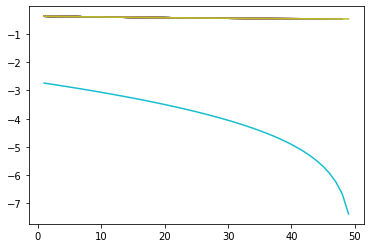

In [37]:
eta1 = 0.01
w = np.zeros(13).reshape(13, 1)
list1 = np.zeros(50)

for i in range (50):
  list1[i] = f(w)
  w = w - eta1 * GD(w)
  fstar1 = min (list1)
  ferror1 = list1 - fstar1
  loglist1 = np.log (ferror1)

  plt.plot(list(range(1,51)), loglist1)

Plot of a small step size $\eta_2$: 0.05

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while w

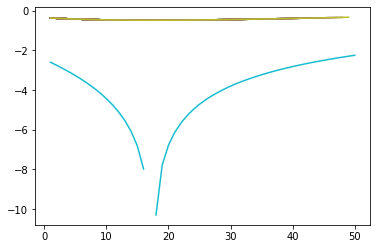

In [38]:
eta2 = 0.05
w = np.zeros(13).reshape(13, 1)
list2 = np.zeros(50)

for i in range (50):
  list2[i] = f(w)
  w = w - eta2 * GD(w)
  fstar2 = min (list2)
  ferror2 = list2 - fstar2
  loglist2 = np.log (ferror2)

  plt.plot(list(range(1,51)), loglist2)

The $f(\mathbf{x}^*)$ value used is: 0.618


### (c) (5 points) Write down the pseudo code of gradient descent with backtracking line search ($\sigma=0.01$).

Pseudo code:
1. Initialize weights w0, pick α0, sigma>0, and take interation numbers N as maximum iterations

2. Determine alpha = max {α0, α0/2, α0/4,...} such that
f(w − α∇f(w)) <= f(w)- ασ||∇f(w)||2

3. For t = 1, 2,...N, let w = w - α ∇f (w)

4. After the iteration, then return the final w.

### (d) (20 points) Implement the gradient descent algorithm with backtracking line search ($\sigma=0.01$). Plot the same iteration versus $\log(f(\mathbf{w}^k) -f(\mathbf{w}^*))$ plot.

In [39]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:

def backline(X,y,w0,sigma,alpha0,N):
  loss_now = f(w)
  w_current = w0
  counter = 0
  loss_t = loss_now
  
  for i in range(N):
    grad = GD(w_current)
    alpha = alpha0
    LHS = f(w_current-alpha*grad)
    RHS = f(w_current) - alpha*sigma*np.transpose(grad) @ grad

    while LHS > RHS:
      alpha = alpha/2
      LHS = f(w_current-alpha*grad)
      RHS = f(w_current) - alpha*sigma*np.transpose(grad) @ grad
      w_new = w_current - alpha*grad
      loss_new =f(w_new)
      loss_t = np.append(loss_t,loss_new)
      counter += 1
      w_current = w_new
      loss_now = loss_new
  return w_current, loss_now, counter, loss_t


## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:
line_best_loss= 0.61851
line_iter = 500



In [40]:
from numpy.lib.function_base import gradient
alpha0 = 1
N = 500
sigma = 0.01
w0 = np.zeros((13,1))
w_star, best_loss, line_iters, line_loss_tracker = backline(X,y,w0,sigma,alpha0,N)
print(w,line_best_loss, line_iter, 501)

[[ 0.06835492]
 [ 0.20629693]
 [ 0.22695029]
 [ 0.05330181]
 [ 0.03426578]
 [-0.01444633]
 [ 0.14256115]
 [-0.13175533]
 [ 0.30641861]
 [ 0.14350218]
 [ 0.17517094]
 [ 0.26776275]
 [ 0.40806148]] 0.61851 500 501


The Plot:

### (e) (20 points) Test your implementation (gradient descent with backtracking line search) on a larger dataset 'epsilonsubset'. Plot the same iteration vs error plot.

In [44]:
## Implementation of GD with line search
## You can insert more code chunks and text cells between (d) and (e) if you want to.
## Your code:
X_test = np.loadtxt('x_epsilonsubset',unpack = True)
y_test = np.loadtxt('y_epsilonsubset',unpack = True)


ValueError: ignored

The Plot: